In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as plotly_express
from sklearn import decomposition



In [47]:
curr_dir=os.getcwd()
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [48]:
df=df.drop("index", axis=1)
features = df.drop(["Patient Id","Level"], axis=1)
labels = df["Level"]

In [49]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


#### Trying to prove linear separability using features selected from info gain 

In [50]:
#Feature importance based on PCA with n_components=3
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

#features selected using Method 3
feature_set_dt=['Coughing of Blood',
 'Wheezing',
 'Obesity',
 'Snoring',
 'Air Pollution',
 'Clubbing of Finger Nails',
 'Swallowing Difficulty'
 ]

feature_set_rf=[
    'Coughing of Blood',
    'Fatigue',
    'Alcohol use',
    'Smoking',
    'Genetic Risk',
    'OccuPational Hazards',
    'Chest Pain',
    'chronic Lung Disease',
    'Age'
]

#### Overall PCA 

In [101]:

def pca_transform(x, y, n_comp):
  pc_list = [f"PC{i+1}" for i in range(n_comp)]
  pca = decomposition.PCA(n_components=n_comp)
  pc = pca.fit_transform(x)
  pc_df = pd.DataFrame(data=pc,columns=pc_list)
  pc_df['Label'] = y
  return pc_df, pca, pc_list

def plot_PCA_2D(pc_df, pca, pc_list):
    # variance explained by PCs
    # PC1 + PC2 explains 78% variance 
    var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
                'PC':pc_list})

    sns.barplot(x='PC',y="Variance", 
            data=var)
    sns.lmplot( x="PC1", y="PC2",
    data=pc_df, 
    fit_reg=False, 
    hue='Label', # color by cluster
    legend=True,
    scatter_kws={"s": 80}) # specify the point size

def plot_PCA_3D(pc_df, pca):
    pca_var_sum=sum(pca.explained_variance_ratio_[:4])
    
    figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label")
    figure.update_layout(showlegend=True)
    figure.show()

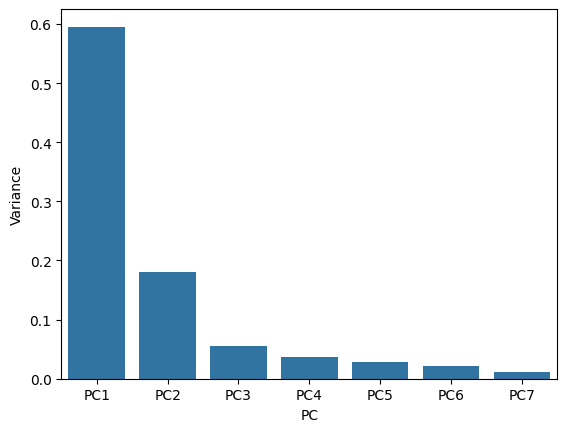

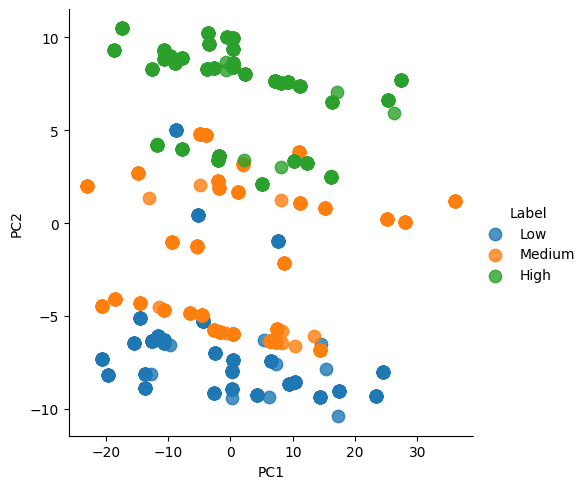

In [126]:
x=df.drop(["Patient Id","Level"], axis=1)
y=df["Level"]
n_comp=7
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

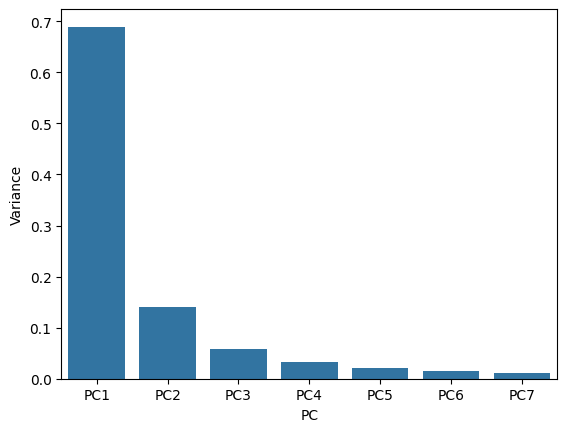

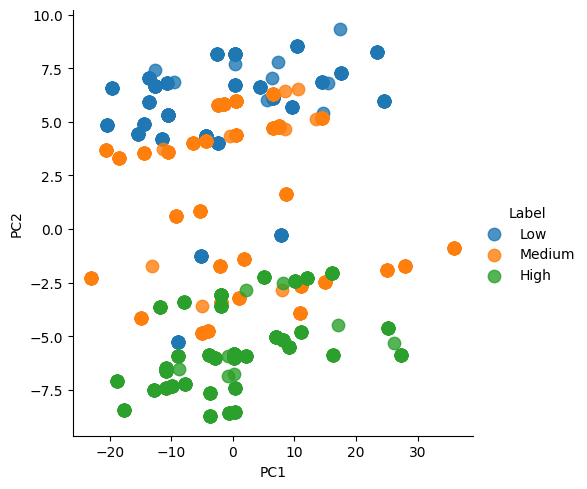

In [104]:
x=df.drop(["Patient Id","Level"], axis=1)
x=x[f_pca]
y=df["Level"]
n_comp=7
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

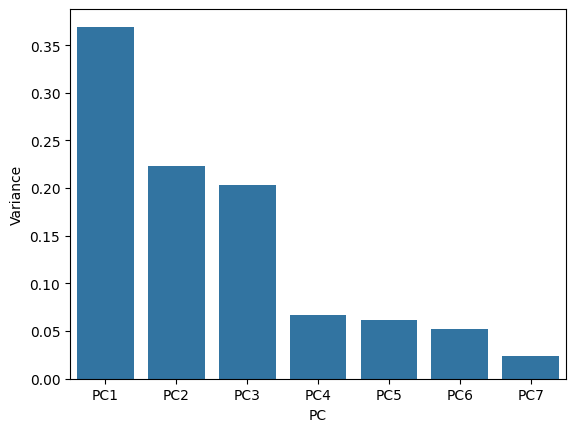

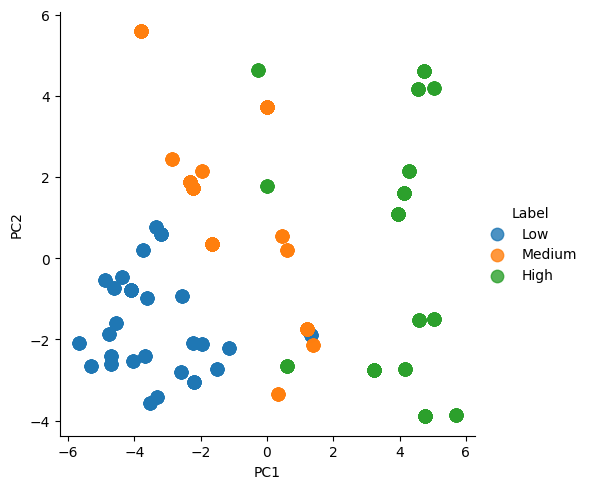

In [127]:
x=df.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df["Level"]
n_comp=7
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [128]:
print(f'Sum of pca variance for PCA 1 - 3: {pca_var_sum}')
plot_PCA_3D(pc_df, pca)

Sum of pca variance for PCA 1 - 3: 0.9188167803168868


The separation for PCA seems to be better when features were selected from decision tree feature importance (feature_set_dt)

#### Separate by classes [Low vs (Medium & High)]

In [129]:
df_low_others = df.copy()
df_low_others["Level"] = df['Level'].replace(["Medium","High"],"medium_high")
pd.unique(df_low_others['Level'])


array(['Low', 'medium_high'], dtype=object)

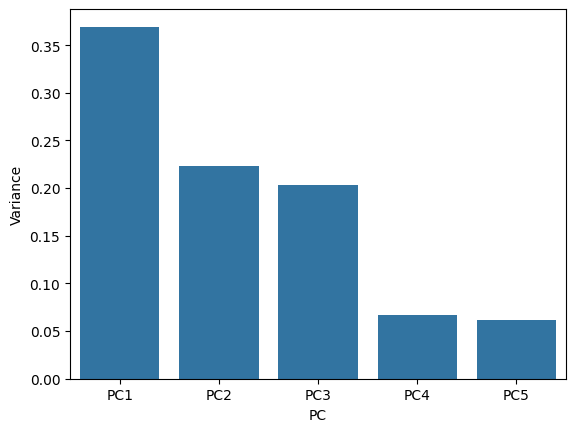

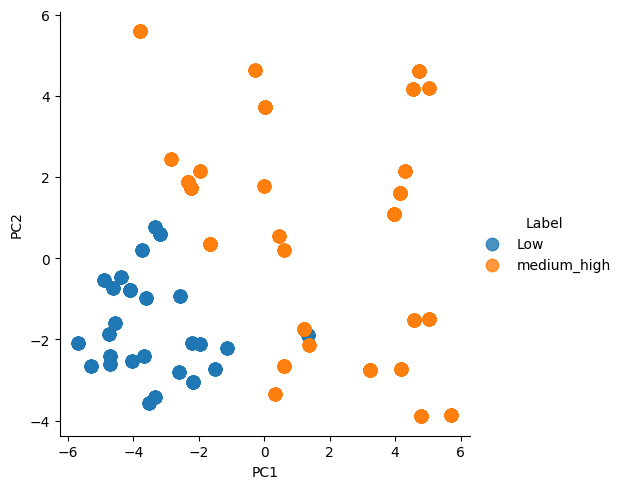

In [130]:
x=df_low_others.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_low_others["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [109]:
pc_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.410605e-16,-1.563194e-16,3.979039e-16,4.973799e-16,2.948752e-16
std,1.202802e+01,5.420883e+00,3.478271e+00,2.582663e+00,2.086540e+00
min,-2.302605e+01,-8.741078e+00,-5.870399e+00,-5.438293e+00,-3.822868e+00
25%,-9.665172e+00,-5.030989e+00,-2.905595e+00,-1.116386e+00,-1.081249e+00
50%,-1.458781e+00,-1.389170e+00,3.146110e-01,5.109502e-02,6.938821e-02
75%,7.542740e+00,5.330624e+00,2.479491e+00,1.174933e+00,5.920298e-01
max,3.594199e+01,9.306663e+00,6.367728e+00,5.871852e+00,5.571811e+00


In [110]:
plot_PCA_3D(pc_df, pca)

#### Separate by classes [High vs (Low & Medium)]

In [111]:
df_high_others = df.copy()
df_high_others["Level"] = df['Level'].replace(["Medium","Low"],"medium_low")
#df_low_others["Level"] = df_low_others['Level'].replace("High","medium_high")
pd.unique(df_high_others['Level'])


array(['medium_low', 'High'], dtype=object)

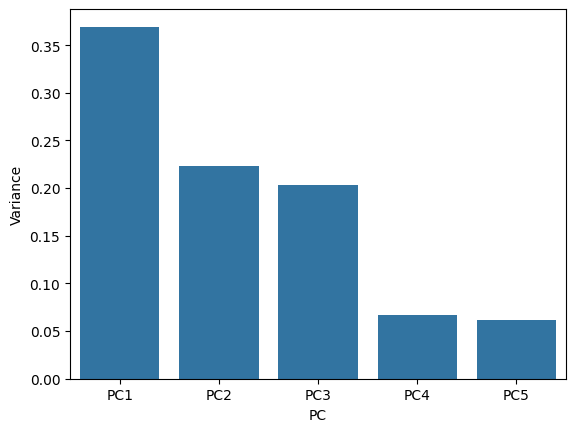

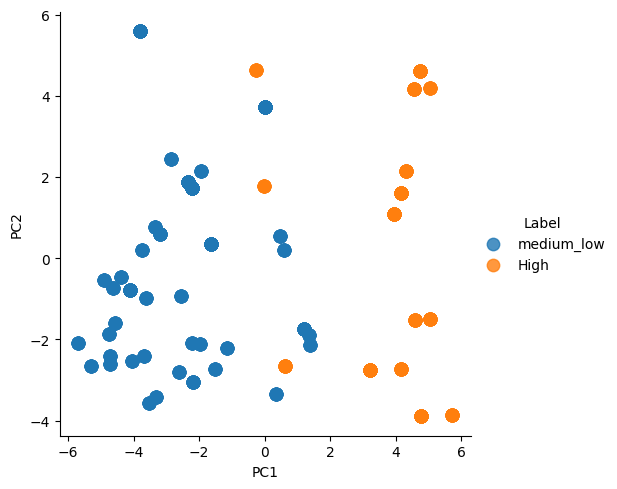

In [131]:
x=df_high_others.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_high_others["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [132]:
plot_PCA_3D(pc_df, pca)

- Medium vs (Low & High)

In [61]:
df_medium_others = df.copy()
df_medium_others["Level"] = df['Level'].replace(["Low","High"],"Low_high")
pd.unique(df_medium_others['Level'])


array(['Low_high', 'Medium'], dtype=object)

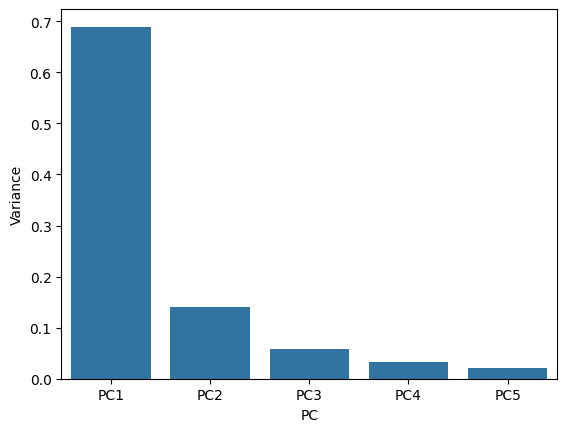

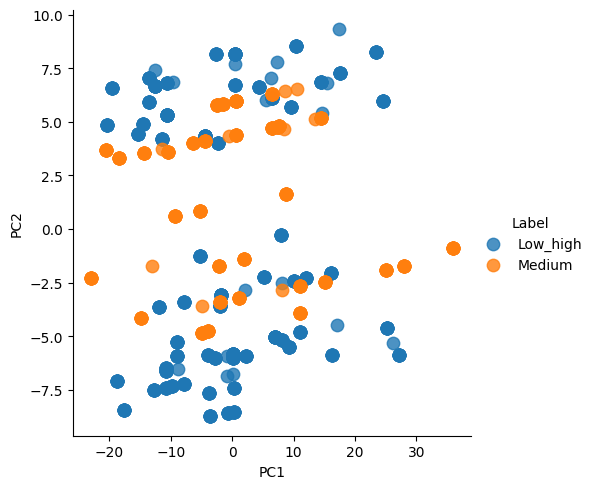

In [114]:
x=df_medium_others.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_medium_others["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [115]:
plot_PCA_3D(pc_df, pca)

#### Removing one of the classes and seeing the PCA effect
- Low vs High 

In [116]:
df_low_high = df.loc[df["Level"].isin(["Low","High"])]
pd.unique(df_low_high['Level'])


array(['Low', 'High'], dtype=object)

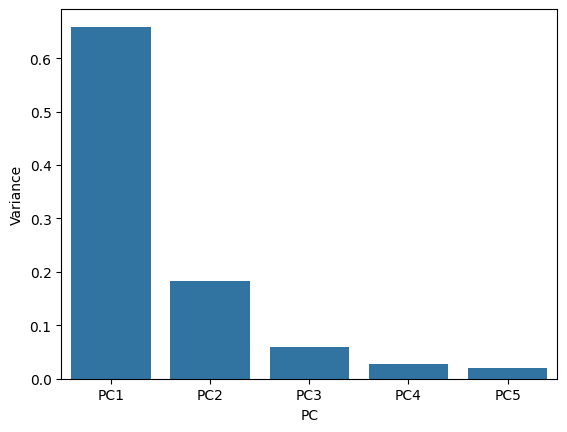

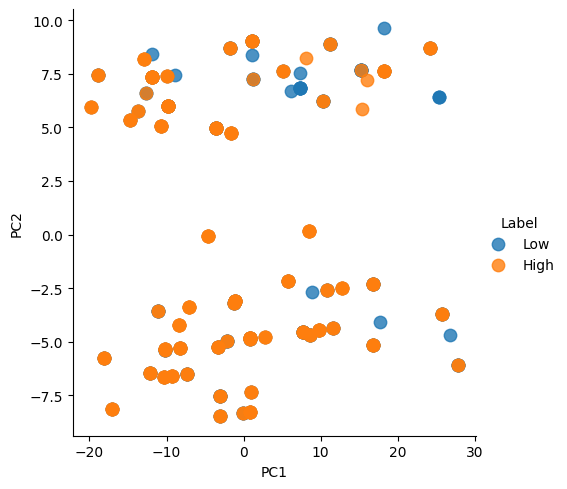

In [117]:
x=df_low_high.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_low_high["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [119]:
plot_PCA_3D(pc_df, pca)

- Low vs Medium

In [67]:
df_low_medium = df.loc[df["Level"].isin(["Low","Medium"])]
pd.unique(df_low_medium['Level'])


array(['Low', 'Medium'], dtype=object)

['Low' 'Medium']


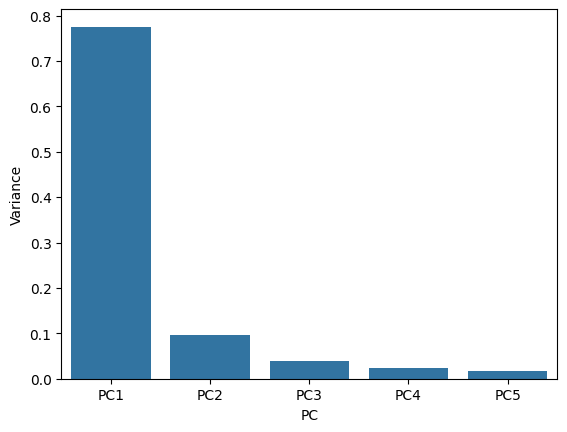

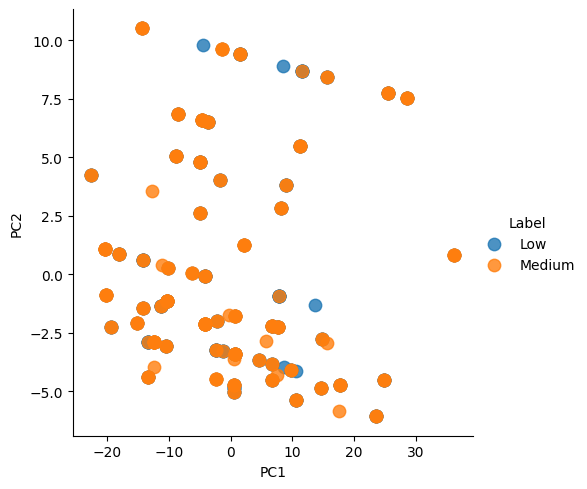

In [121]:
df_low_medium = df.loc[df["Level"].isin(["Low","Medium"])]
print(pd.unique(df_low_medium['Level']))
x=df_low_medium.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_low_medium["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [123]:
plot_PCA_3D(pc_df, pca)

- Medium vs High

In [71]:
df_medium_high = df.loc[df["Level"].isin(["Medium","High"])]
pd.unique(df_medium_high['Level'])


array(['Medium', 'High'], dtype=object)

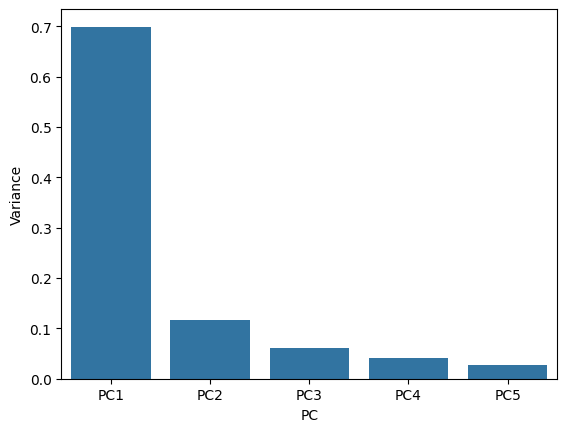

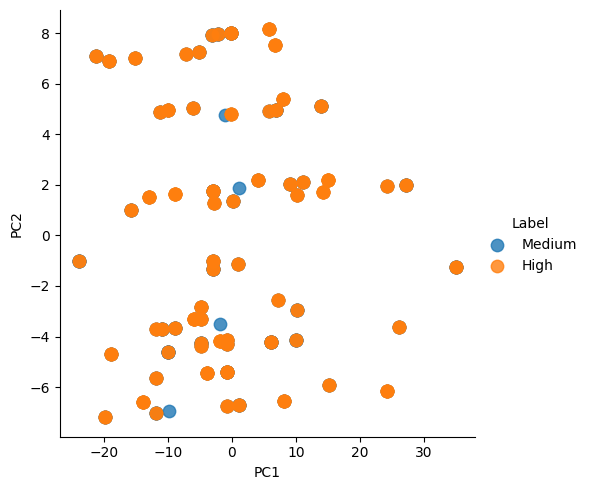

In [124]:
x=df_medium_high.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_medium_high["Level"]
n_comp=5
pc_list = [f"PC{i+1}" for i in range(n_comp)]
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [125]:
plot_PCA_3D(pc_df, pca)

## LDA for checking separability

Using all features

Low
Medium


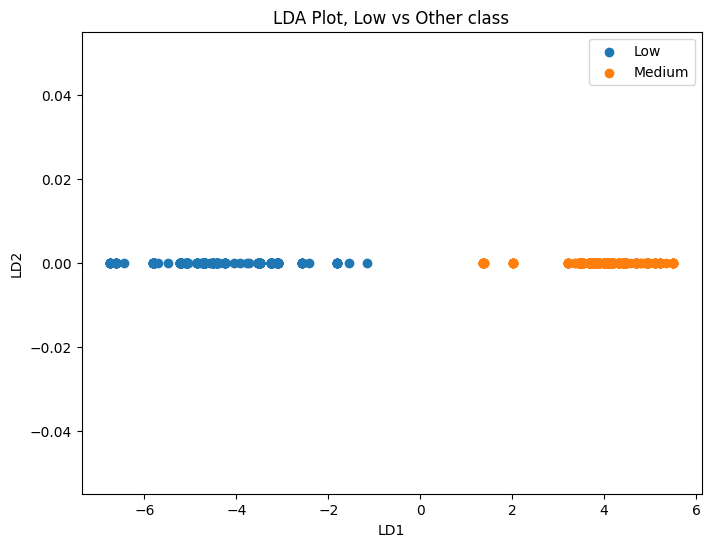

In [136]:
# Using all features, but 1vsall each label
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# filtered_df = df[df['Level'] != 'High'] #remove the 'High' label

# X = df.drop(["Patient Id","Level"], axis=1)
# y = df_low_others["Level"]

'''
Note I also tried using the df_low_others, but the "Low" didn't quite separate.
I think it's because LDA is trying to maximize the class centroids AND minimizing variance within each class.
Thus renaming Med and High into Med-High kinda create bias distribution, probably making LDA prioritize the the latter.
Better separation if I just remove High.
'''

X = df_low_medium.drop(["Patient Id","Level"], axis=1)
y = df_low_medium["Level"]



lda = LinearDiscriminantAnalysis()

df_lda = lda.fit(X,y)
df_lda = lda.transform(X)


plt.figure(figsize=(8, 6))
for label in np.unique(y):
    print(label)
    plt.scatter(df_lda[y == label, 0], np.zeros_like(df_lda[y == label, 0]), label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Plot, Low vs Other class')
plt.legend()

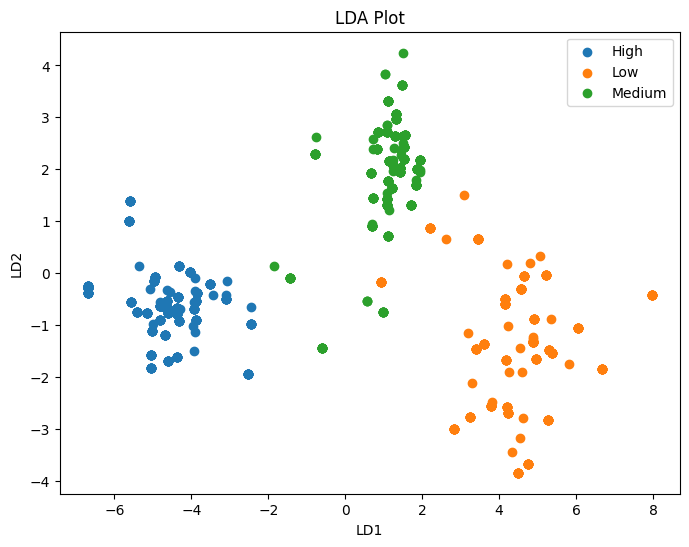

In [138]:
# X = df[feature_set_dt]
X = df.drop(["Patient Id","Level"], axis=1)
y = df["Level"]

lda = LinearDiscriminantAnalysis()

df_lda = lda.fit(X,y)
df_lda = lda.transform(X)

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(df_lda[y == label, 0], df_lda[y == label, 1], label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Plot')
plt.legend()
plt.show()



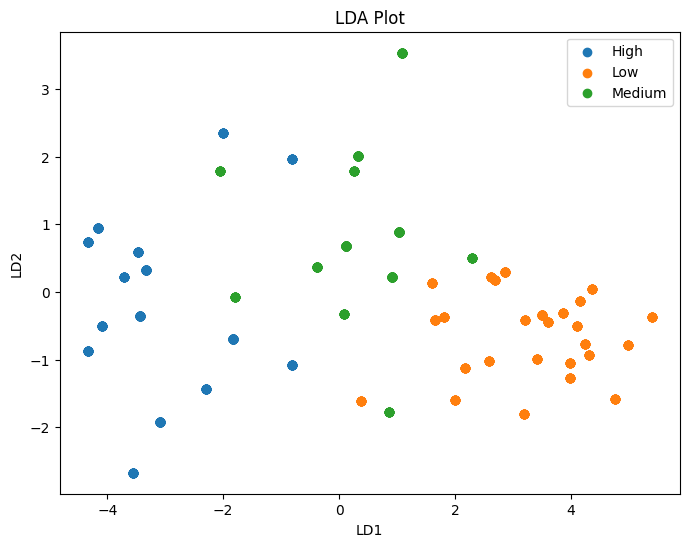

In [ ]:
X = df[feature_set_dt]
y = df["Level"]

lda = LinearDiscriminantAnalysis()

df_lda = lda.fit(X,y)
df_lda = lda.transform(X)


plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(df_lda[y == label, 0], df_lda[y == label, 1], label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Plot')
plt.legend()
plt.show()



#### Random trying stuff

In [ ]:
f_select_k = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                    'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
                    'Chest Pain', 'Coughing of Blood']
f_pca = ['Age','Alcohol use','Smoking','chronic Lung Disease','Fatigue',
            'Coughing of Blood','Chest Pain','Genetic Risk','OccuPational Hazards']

In [ ]:
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']


In [ ]:
selected_features = df[f_pca]
selected_features.shape

(1000, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X = selected_features
# Can replace this with our features when we have
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# linear_clf = svm.SVC(probability=True)
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_clf, X, y, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X = features
# X= scaler.fit_transform(X)

X[['Age']] = scaler.fit_transform(X[['Age']])
# X_test_scaled = scaler.transform(X_test)
# Can replace this with our features when we have
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train, y_train)
# Predicting on the test set
y_pred = logistic_clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  1.0


/Users/eugenegan/Documents/GitHub_repo/Lung_Cancer_Prediction/ML_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [139]:
logistic_clf.intercept_
logistic_clf.coef_

array([[ 0.03222952, -0.81865495,  0.67283488,  1.60368156, -1.74853247,
         0.01662802, -0.89941949, -0.08611429,  0.55423475,  0.63626964,
        -0.73620481,  1.08408464, -0.0882244 ,  0.38130901,  1.18304406,
        -0.31894261,  0.2713501 , -0.2075846 ,  0.58951791,  0.39670681,
        -0.13313232, -0.17770604, -0.52248432],
       [-0.52375145,  0.70326591,  0.25986528, -0.95372101,  0.13218887,
         0.83385861, -0.96923091, -0.23894952, -0.04431159, -0.62032928,
         0.88567548, -1.07405492,  0.61612728, -0.33400055, -1.31180733,
         0.6949259 , -0.22564829, -0.13123874, -0.72327769, -0.82278523,
        -0.10051642, -0.0106106 , -0.02959204],
       [ 0.49152192,  0.11538904, -0.93270016, -0.64996055,  1.61634359,
        -0.85048662,  1.8686504 ,  0.32506381, -0.50992317, -0.01594036,
        -0.14947067, -0.01002971, -0.52790288, -0.04730846,  0.12876327,
        -0.37598329, -0.04570181,  0.33882334,  0.13375978,  0.42607842,
         0.23364874,  0.1883